# Loss Rate Analysis (Annex 4)

## 1. Objectives
This notebook focuses on **Loss Prevention & Profit Protection**. We analyze the loss rate data (`annex4.csv`) to key areas for inventory optimization.

**Key Goals:**
- **Data Engineering**: Validate loss percentages (0-100%) and clean anomalies.
- **Waste Visualization**: Interactive identification of high-loss items.
- **Pareto Analysis**: Focusing efforts on the "Critical Few" items causing the most damage.
- **Operational Strategy**: Developing data-driven waste reduction protocols.

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import warnings

warnings.filterwarnings('ignore')

## 2. Data Loading & Engineering

In [11]:
file_path = 'annex4.csv'
df = pd.read_csv(file_path)

# Deep Cleaning
# 1. Validate Loss Rate Range (0-100%)
invalid_loss = df[(df['Loss Rate (%)'] < 0) | (df['Loss Rate (%)'] > 100)]
if not invalid_loss.empty:
    print(f"Warning: {len(invalid_loss)} items have invalid loss rates (outside 0-100%). Clipping them.")
    df['Loss Rate (%)'] = df['Loss Rate (%)'].clip(0, 100)

# 2. Check for Duplicates
duplicates = df.duplicated(subset=['Item Code']).sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicate Item Codes. Aggregating by mean loss rate.")
    df = df.groupby(['Item Code', 'Item Name'])['Loss Rate (%)'].mean().reset_index()

print("Loss data loaded and cleaned.")

# EXPORT CLEANED DATA
cleaned_file_path = 'annex4_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned loss data exported to {cleaned_file_path}")
df.head()

Loss data loaded and cleaned.
Cleaned loss data exported to annex4_cleaned.csv


,Item Code,Item Name,Loss Rate (%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80
3,102900005115625,Local Xiaomao Cabbage,0.18
4,102900005115748,White Caitai,8.78


## 3. Interactive Loss Analytics

### 3.1 The "Red Zone": Top 20 High-Loss Items
These items are bleeding profit. This interactive chart lets you hover to see exact loss percentages.

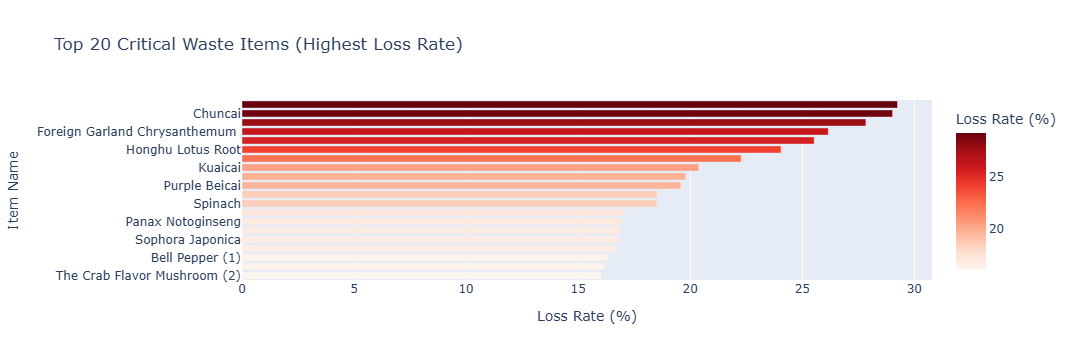

In [12]:
# Top 20 items by Loss Rate
high_loss = df.sort_values(by='Loss Rate (%)', ascending=False).head(20)

fig = px.bar(high_loss, x='Loss Rate (%)', y='Item Name', orientation='h', 
             title='Top 20 Critical Waste Items (Highest Loss Rate)',
             color='Loss Rate (%)', color_continuous_scale='Reds')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

### 3.2 Loss Distribution Histogram
Are most items safe? This histogram shows the spread of risk across the portfolio.

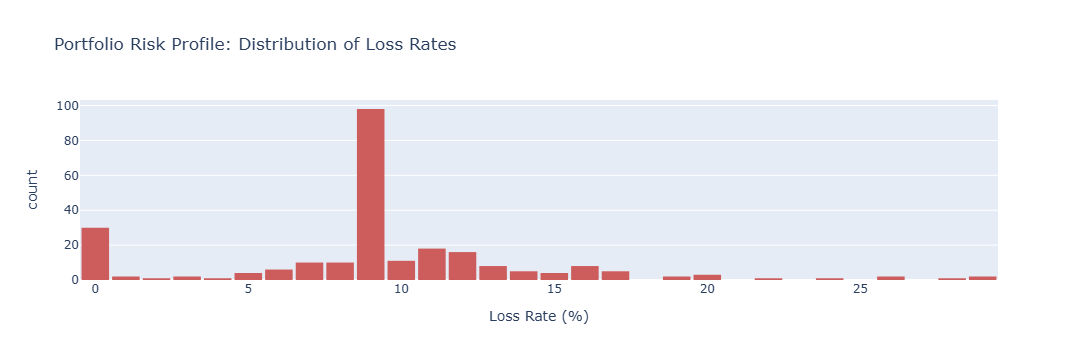

In [13]:
fig = px.histogram(df, x='Loss Rate (%)', nbins=30, 
                   title='Portfolio Risk Profile: Distribution of Loss Rates',
                   color_discrete_sequence=['indianred'])
fig.update_layout(bargap=0.1)
fig.show()

## 4. Strategic Insights & Waste Reduction Strategy

### 📊 Operational Intelligence
- **Critical Few**: Chart 3.1 likely shows that a small number of perishable items account for the most severe loss rates. These are typically leafy greens or specific aquatic products.
- **Risk Profile**: Chart 3.2 tells you the general health. A long tail to the right indicates isolated issues rather than systemic rot.

### 🚀 Actionable Recommendations
1.  **"Red Zone" Protocol**: 
    -   *Insight*: For the Top 20 items identified in Chart 3.1.
    -   *Action*: Implement strict **Just-In-Time (JIT)** ordering. Do not hold overnight stock for these items. If they sell out, they sell out.

2.  **Visual Merchandising**: 
    -   *Insight*: High loss often comes from handling damage.
    -   *Action*: Review the display methods for the "Red Zone" items. Are they being crushed? Are they refrigerated correctly?

3.  **Clearance Strategy**:
    -   *Insight*: Loss = 100% margin destruction.
    -   *Action*: Program an automatic 50% discount trigger at 6:00 PM for the specific SKU list from Chart 3.1. It is better to recover cost than to toss the product.